# S1: Importing data and dependencies:

In [106]:
!pip install sdv

  Using cached numpy-2.3.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.4-cp313-cp313-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flwr 1.23.0 requires protobuf<5.0.0,>=4.21.6, but you have protobuf 6.33.0 which is incompatible.
qiskit-terra 0.45.0 requires numpy<2,>=1.17, but you have numpy 2.3.4 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import shap
import socket
import matplotlib.pyplot as plt
from tqdm import tqdm

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [109]:
import seaborn as sns
import os
import gc
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [111]:
from sdv.single_table import CTGANSynthesizer
from sklearn.utils import resample

In [112]:
df = pd.read_csv('../data/raw/output.csv')

In [113]:
df.describe()

,Unnamed: 0,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,is_attack
count,3.243188e+06,3.243188e+06,3.243188e+06,3243188.0,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,...,3243188.0,3243188.0,3243188.0,3243188.0,3243188.0,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06
mean,1.621594e+06,3.634365e+04,2.211043e+04,0.0,4.403567e+00,3.486160e+02,1.493543e-01,6.706498e+00,4.452592e-01,1.112331e+01,...,0.0,0.0,0.0,0.0,0.0,3.683129e+03,3.532748e+03,5.405899e+02,1.587690e+02,7.635305e-01
std,9.362279e+05,1.887212e+04,2.108410e+04,0.0,2.652355e+01,1.760810e+03,3.857696e-01,2.646323e+01,1.291482e+00,7.712782e+01,...,0.0,0.0,0.0,0.0,0.0,1.417519e+04,1.453626e+04,2.117687e+03,1.433575e+03,4.249138e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.107968e+05,2.139575e+04,1.883000e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.621594e+06,3.932700e+04,1.513600e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.432390e+06,5.248400e+04,4.029900e+04,0.0,1.000000e+00,6.100000e+01,0.000000e+00,0.000000e+00,2.160000e-04,3.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.024000e+03,0.000000e+00,5.120000e+02,0.000000e+00,1.000000e+00
max,3.243187e+06,6.553400e+04,6.553500e+04,0.0,2.950000e+02,1.711000e+04,1.200000e+01,1.312000e+03,4.999897e+00,2.448100e+04,...,0.0,0.0,0.0,0.0,0.0,6.553500e+04,6.553500e+04,6.553500e+04,6.516000e+04,1.000000e+00


In [114]:
df.isnull().sum()

Unnamed: 0              0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
                       ..
bwd_init_window_size    0
fwd_last_window_size    0
bwd_last_window_size    0
traffic                 0
is_attack               0
Length: 102, dtype: int64

In [115]:
df['traffic'].value_counts()

traffic
camoverflow     1640039
normal           766915
netscan          467093
rudeadyet        131081
apachekiller      84579
mqttmalaria       69623
slowloris         63608
arpspoofing       11236
slowread           9014
Name: count, dtype: int64

In [116]:
df.select_dtypes(include=['float64', 'int64']).columns.tolist()

['Unnamed: 0',
 'id.orig_p',
 'id.resp_p',
 'missed_bytes',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'flow_duration',
 'fwd_pkts_tot',
 'bwd_pkts_tot',
 'fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'fwd_pkts_per_sec',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'down_up_ratio',
 'fwd_header_size_tot',
 'fwd_header_size_min',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_min',
 'bwd_header_size_max',
 'flow_FIN_flag_count',
 'flow_SYN_flag_count',
 'flow_RST_flag_count',
 'fwd_PSH_flag_count',
 'bwd_PSH_flag_count',
 'flow_ACK_flag_count',
 'fwd_URG_flag_count',
 'bwd_URG_flag_count',
 'flow_CWR_flag_count',
 'flow_ECE_flag_count',
 'fwd_pkts_payload.min',
 'fwd_pkts_payload.max',
 'fwd_pkts_payload.tot',
 'fwd_pkts_payload.avg',
 'fwd_pkts_payload.std',
 'bwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'bwd_pkts_payload.avg',
 'bwd_pkts_payload.std',
 'flow_pkts_payload.min',
 'flow_pkts_payload.max',
 'flow_pkts_payl

# S2: Missing data handling and feature imputation

In [117]:
mask = (df == '-').any()
print(mask[mask])

service           True
duration          True
orig_bytes        True
resp_bytes        True
history           True
tunnel_parents    True
dtype: bool


In [118]:
df.replace('-', np.nan, inplace=True)

In [119]:
missing = df.columns[df.isnull().any()].tolist()

In [120]:
df[missing].isnull().sum() * 100 / len(df)

service            87.569052
duration           61.243073
orig_bytes         61.243073
resp_bytes         61.243073
history            50.571906
tunnel_parents    100.000000
dtype: float64

In [121]:
for col in ['duration', 'orig_bytes', 'resp_bytes']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [122]:
if 'history' in df.columns:
    df['history'].fillna('unknown', inplace=True)

In [123]:
df.drop(columns=['service', 'tunnel_parents'], inplace=True, errors='ignore')

In [124]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

In [125]:
df

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,0,10.10.10.252,48256,10.10.10.249,80,tcp,0.024381,13236.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
1,1,10.10.10.252,48258,10.10.10.249,80,tcp,0.024080,13236.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
2,2,10.10.10.252,48268,10.10.10.249,80,tcp,0.002000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,502,65160,apachekiller,1
3,3,10.10.10.252,48208,10.10.10.249,80,tcp,0.060782,13236.0,0.0,SH,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
4,4,10.10.10.252,48180,10.10.10.249,80,tcp,0.060774,13236.0,0.0,SH,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243183,3243183,10.10.10.252,33506,10.10.10.249,80,tcp,0.004861,279.0,0.0,SH,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
3243184,3243184,10.10.10.252,5353,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,508,slowread,1
3243185,3243185,10.10.10.252,42790,10.10.10.249,80,tcp,0.000000,0.0,0.0,OTH,...,0.0,0.0,0.0,0.0,512,0,512,0,slowread,1
3243186,3243186,10.10.10.252,39610,10.10.10.249,80,tcp,0.044895,0.0,0.0,OTH,...,0.0,0.0,0.0,0.0,1825,509,1825,509,slowread,1


In [126]:
LABEL = 'traffic'

In [127]:
SAMPLES = 20000

In [128]:
spoof_df = df[df[LABEL] == 'arpspoofing'].copy()

In [129]:
spoof_df.shape

(11236, 100)

In [130]:
gen_spoof = SAMPLES - len(spoof_df)

In [131]:
gen_spoof

8764

In [132]:
from sdv.metadata import Metadata

In [133]:
metadata = Metadata.detect_from_dataframe(
    data=spoof_df,
    table_name='spoofing_table')

In [134]:
ctgan1 = CTGANSynthesizer(metadata, epochs=50, verbose=True)

In [135]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [136]:
len(num_cols)

92

In [137]:
cat_cols = [c for c in df.columns if c not in num_cols + [LABEL, 'label']]

In [138]:
cat_cols

['id.orig_h',
 'id.resp_h',
 'proto',
 'conn_state',
 'local_orig',
 'local_resp',
 'history']

In [139]:
# df = df.drop(columns = ['id.orig_h', 'id.resp_h'], axis = 1)

In [140]:
# df

In [141]:
categorical_cols = ['proto', 'conn_state', 'local_orig', 'local_resp', 'history']

for col in categorical_cols:
    df[col] = df[col].astype(str).fillna("unknown")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [142]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [143]:
cat_cols = [c for c in df.columns if c not in num_cols + [LABEL, 'label']]

In [144]:
len(num_cols)

97

In [145]:
len(cat_cols)

2

In [146]:
ctgan1.fit(spoof_df)

Gen. (-5.14) | Discrim. (-1.36): 100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


In [147]:
fig = ctgan1.get_loss_values_plot()
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Generator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Generator Loss',
              'line': {'color': '#000036', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Generator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAgAiuzL8AAABgD/wIwAAAAMAysP' ... 'A1gRHAAAAAIIzx/78AAACAJ5QUwA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Discriminator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Discriminator Loss',
              'line': {'color': '#01E0C9', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Discriminator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAgHc5CsAAAAAAujnBPwAAAIC0yt' ... 'CVT/G/AAAAgPzl878AAAAAUsb1vw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'orientation': 'v', 'title': {'text': ''}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'template': '...',
               'title': {'text': 'CTGAN loss function'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

In [148]:
synth_data = ctgan1.sample(gen_spoof)

In [149]:
synth_data

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,4267787,10.10.10.252,49834,224.0.0.251,5353,udp,0.003672,0.0,0.0,New Hampshire,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,5897036,10.10.10.252,43337,224.0.0.251,5353,udp,0.000000,1.0,0.0,Wyoming,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,15908185,10.10.10.252,58134,10.10.10.0,5353,udp,0.000000,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,1825,0,arpspoofing,1
3,12316139,10.10.10.252,34435,224.0.0.251,137,udp,0.000289,1.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,61713,10.10.10.252,36242,224.0.0.251,5353,udp,0.000000,1.0,0.0,New York,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,5976380,10.10.10.252,36043,224.0.0.251,137,udp,0.003478,0.0,0.0,Kentucky,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8760,1620377,10.10.10.252,60493,224.0.0.251,5353,udp,0.000000,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8761,7199506,10.10.10.252,50082,10.10.10.249,5353,udp,0.001036,1.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8762,5998597,10.10.10.252,36646,10.10.10.255,137,udp,0.000000,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,512,0,1825,0,arpspoofing,1


In [150]:
spoof_balanced = pd.concat([spoof_df, synth_data], ignore_index=True)

In [151]:
spoof_balanced

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,84579,10.10.10.252,56248,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,84580,10.10.10.252,50214,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,84581,10.10.10.252,58369,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,84582,10.10.10.252,57377,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,84583,10.10.10.252,12345,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5976380,10.10.10.252,36043,224.0.0.251,137,udp,0.003478,0.0,0.0,Kentucky,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19996,1620377,10.10.10.252,60493,224.0.0.251,5353,udp,0.000000,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19997,7199506,10.10.10.252,50082,10.10.10.249,5353,udp,0.001036,1.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19998,5998597,10.10.10.252,36646,10.10.10.255,137,udp,0.000000,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,512,0,1825,0,arpspoofing,1


In [152]:
balanced_parts = [spoof_balanced]

In [153]:
slowread_df = df[df[LABEL] == 'slowread'].copy()

In [154]:
metadata2 = Metadata.detect_from_dataframe(
    data=slowread_df,
    table_name='slowread_table')

In [155]:
ctgan2 = CTGANSynthesizer(metadata, epochs=50, verbose=True)

In [156]:
ctgan2.fit(slowread_df)

Gen. (-1.93) | Discrim. (-1.24): 100%|██████████| 50/50 [01:42<00:00,  2.05s/it]


In [157]:
fig2 = ctgan2.get_loss_values_plot()
fig2

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Generator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Generator Loss',
              'line': {'color': '#000036', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Generator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAF3oAUAAAAAAgFPJPwAAAKDxu+' ... 'ByqwbAAAAAgNZpBcAAAABgvc3+vw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Discriminator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Discriminator Loss',
              'line': {'color': '#01E0C9', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Discriminator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAoBkbD8AAAACA69bbvwAAAACyi8' ... 'DClfa/AAAAAFpf9L8AAACAZdPzvw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'orientation': 'v', 'title': {'text': ''}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'template': '...',
               'title': {'text': 'CTGAN loss function'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

In [158]:
gen_slowread = SAMPLES - len(slowread_df)

In [159]:
synth_data2 = ctgan2.sample(gen_slowread)

In [160]:
synth_data2

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,6192177,10.10.10.252,51723,10.10.10.249,80,1,0.071482,3.0,0.0,Mississippi,...,0.0,0.0,0.0,0.0,0,508,576,508,slowread,1
1,12299054,10.10.10.252,33790,10.10.10.249,80,1,0.043254,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,301,508,1152,0,slowread,1
2,9579783,10.10.10.252,57214,10.10.10.249,80,1,0.048335,5.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,301,0,1152,508,slowread,1
3,12154906,10.10.10.252,35945,10.10.10.249,80,1,0.071086,1.0,0.0,Maryland,...,0.0,0.0,0.0,0.0,301,65160,1152,0,slowread,1
4,9426754,10.10.10.252,44904,10.10.10.249,80,1,0.074402,0.0,0.0,Utah,...,0.0,0.0,0.0,0.0,1152,65160,0,507,slowread,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,11183272,10.10.10.252,34267,10.10.10.249,80,2,0.049317,150.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,301,508,301,0,slowread,1
10982,13058653,10.10.10.252,58832,10.10.10.249,80,1,0.073711,3.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
10983,5273497,10.10.10.252,33824,10.10.10.249,80,1,0.042171,2.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,301,0,1152,0,slowread,1
10984,9028790,10.10.10.252,35087,10.10.10.249,80,1,0.075148,154.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,65160,301,508,slowread,1


In [161]:
slowread_balanced = pd.concat([slowread_df, synth_data2], ignore_index=True)

In [162]:
slowread_balanced

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,3234174,10.10.10.252,54590,10.10.10.249,80,1,0.047554,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,slowread,1
1,3234175,10.10.10.252,54606,10.10.10.249,80,1,0.048148,0.0,0.0,0,...,0.0,0.0,0.0,0.0,512,0,512,0,slowread,1
2,3234176,10.10.10.252,54570,10.10.10.249,80,1,0.048707,0.0,0.0,0,...,0.0,0.0,0.0,0.0,1825,509,1825,509,slowread,1
3,3234177,10.10.10.252,58256,10.10.10.249,80,1,0.042596,0.0,0.0,0,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
4,3234178,10.10.10.252,58250,10.10.10.249,80,1,0.042874,0.0,0.0,0,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,11183272,10.10.10.252,34267,10.10.10.249,80,2,0.049317,150.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,301,508,301,0,slowread,1
19996,13058653,10.10.10.252,58832,10.10.10.249,80,1,0.073711,3.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
19997,5273497,10.10.10.252,33824,10.10.10.249,80,1,0.042171,2.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,301,0,1152,0,slowread,1
19998,9028790,10.10.10.252,35087,10.10.10.249,80,1,0.075148,154.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,65160,301,508,slowread,1


In [163]:
combined_df = pd.concat([spoof_balanced, slowread_balanced], ignore_index=True).drop_duplicates()

In [164]:
combined_df

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,84579,10.10.10.252,56248,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,84580,10.10.10.252,50214,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,84581,10.10.10.252,58369,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,84582,10.10.10.252,57377,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,84583,10.10.10.252,12345,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,11183272,10.10.10.252,34267,10.10.10.249,80,2,0.049317,150.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,301,508,301,0,slowread,1
39996,13058653,10.10.10.252,58832,10.10.10.249,80,1,0.073711,3.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
39997,5273497,10.10.10.252,33824,10.10.10.249,80,1,0.042171,2.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,301,0,1152,0,slowread,1
39998,9028790,10.10.10.252,35087,10.10.10.249,80,1,0.075148,154.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,65160,301,508,slowread,1


In [165]:
df.head()

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,0,10.10.10.252,48256,10.10.10.249,80,1,0.024381,13236.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
1,1,10.10.10.252,48258,10.10.10.249,80,1,0.024080,13236.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
2,2,10.10.10.252,48268,10.10.10.249,80,1,0.002000,0.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,502,65160,apachekiller,1
3,3,10.10.10.252,48208,10.10.10.249,80,1,0.060782,13236.0,0.0,8,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
4,4,10.10.10.252,48180,10.10.10.249,80,1,0.060774,13236.0,0.0,8,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1


In [166]:
EXCLUDE_CLASSES = ['arpspoofing', 'slowread']
SAMPLES_PER_CLASS = 20000
selected_parts = []

In [167]:
for cls, group in df.groupby('traffic'):
    if cls.lower() in EXCLUDE_CLASSES:
        continue  # skip these
    
    n_avail = len(group)
    # Sample 20k unique rows or all if fewer
    if n_avail >= SAMPLES_PER_CLASS:
        sampled = group.sample(n=SAMPLES_PER_CLASS, random_state=42, replace=False)
    else:
        sampled = group.sample(n=n_avail, random_state=42, replace=False)
    
    selected_parts.append(sampled)

# Combine selected samples
other_classes_df = pd.concat(selected_parts, ignore_index=True).drop_duplicates()

In [168]:
final_df = pd.concat([combined_df, other_classes_df], ignore_index=True).drop_duplicates()

In [169]:
final_df['traffic'].value_counts()

traffic
arpspoofing     20000
slowread        20000
apachekiller    20000
camoverflow     20000
mqttmalaria     20000
netscan         20000
normal          20000
rudeadyet       20000
slowloris       20000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target
le = LabelEncoder()
final_df['label_enc'] = le.fit_transform(final_df['traffic'])
X = final_df.drop(['traffic', 'is_attack', 'label_enc', 'id.resp_h', 'id.resp_h', 'Unnamed: 0'], axis=1)
y = final_df['label_enc']

# Scale numeric features
X = X.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(126000, 91) (27000, 91) (27000, 91)



RandomForest Accuracy: 0.9993
              precision    recall  f1-score   support

apachekiller       1.00      1.00      1.00      3000
 arpspoofing       1.00      1.00      1.00      3000
 camoverflow       1.00      1.00      1.00      3000
 mqttmalaria       1.00      1.00      1.00      3000
     netscan       1.00      1.00      1.00      3000
      normal       1.00      1.00      1.00      3000
   rudeadyet       1.00      1.00      1.00      3000
   slowloris       1.00      1.00      1.00      3000
    slowread       1.00      1.00      1.00      3000

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



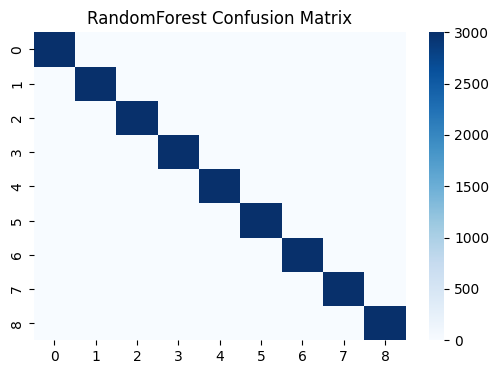


XGBoost Accuracy: 0.9999
              precision    recall  f1-score   support

apachekiller       1.00      1.00      1.00      3000
 arpspoofing       1.00      1.00      1.00      3000
 camoverflow       1.00      1.00      1.00      3000
 mqttmalaria       1.00      1.00      1.00      3000
     netscan       1.00      1.00      1.00      3000
      normal       1.00      1.00      1.00      3000
   rudeadyet       1.00      1.00      1.00      3000
   slowloris       1.00      1.00      1.00      3000
    slowread       1.00      1.00      1.00      3000

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



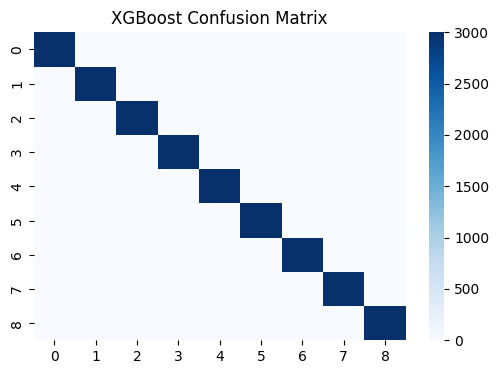

In [171]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    results[name] = acc
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [172]:
class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64, num_heads=4):
        super(CNN_BiLSTM_Attention, self).__init__()
        
        # CNN feature extractor
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)
        
        # BiLSTM block
        self.bilstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        # Multi-Head Self-Attention
        self.attention = nn.MultiheadAttention(embed_dim=2*lstm_hidden, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(2*lstm_hidden)

        # Dense layers
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                 # (batch, 1, seq_len)
        x = torch.relu(self.conv1(x))          # (batch, 64, seq_len)
        x = torch.relu(self.conv2(x))          # (batch, 128, seq_len)
        x = self.pool(x)                       # (batch, 128, seq_len//2)
        
        # Prepare for LSTM: (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        x, _ = self.bilstm(x)                  # (batch, seq_len//2, 2*lstm_hidden)
        
        # Multihead Self-Attention with residual connection
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)

        # Global average pooling over the sequence dimension
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)    # (batch, 2*lstm_hidden)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)                        # logits
        return x


Epoch 1/20 | Train Loss: 0.2746 | Val Loss: 0.0723 | Train Acc: 0.9121 | Val Acc: 0.9814
Epoch 2/20 | Train Loss: 0.0633 | Val Loss: 0.0549 | Train Acc: 0.9810 | Val Acc: 0.9802
Epoch 3/20 | Train Loss: 0.0417 | Val Loss: 0.0323 | Train Acc: 0.9871 | Val Acc: 0.9893
Epoch 4/20 | Train Loss: 0.0351 | Val Loss: 0.0334 | Train Acc: 0.9887 | Val Acc: 0.9870
Epoch 5/20 | Train Loss: 0.0301 | Val Loss: 0.0332 | Train Acc: 0.9903 | Val Acc: 0.9898
Epoch 6/20 | Train Loss: 0.0306 | Val Loss: 0.0260 | Train Acc: 0.9899 | Val Acc: 0.9913
Epoch 7/20 | Train Loss: 0.0244 | Val Loss: 0.0328 | Train Acc: 0.9919 | Val Acc: 0.9897
Epoch 8/20 | Train Loss: 0.0242 | Val Loss: 0.0206 | Train Acc: 0.9917 | Val Acc: 0.9939
Epoch 9/20 | Train Loss: 0.0218 | Val Loss: 0.0184 | Train Acc: 0.9925 | Val Acc: 0.9940
Epoch 10/20 | Train Loss: 0.0192 | Val Loss: 0.0179 | Train Acc: 0.9935 | Val Acc: 0.9943
Epoch 11/20 | Train Loss: 0.0171 | Val Loss: 0.0212 | Train Acc: 0.9944 | Val Acc: 0.9924
Epoch 12/20 | Train

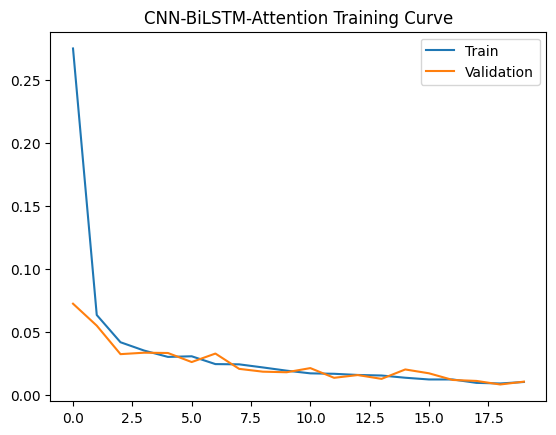

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
y_val_t = torch.tensor(y_val.values, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128, shuffle=False)

# Model
num_classes = len(le.classes_)
input_len = X_train_t.shape[1]
model = CNN_BiLSTM_Attention(input_len, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
EPOCHS = 20

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    # ---- Training ----
    model.train()
    total_loss = 0
    all_preds, all_labels = [], []

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = torch.argmax(out, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

    train_acc = accuracy_score(all_labels, all_preds)
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # ---- Validation ----
    model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            outputs = model(Xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(yb.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

# Plot loss
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.legend()
plt.title("CNN-BiLSTM-Attention Training Curve")
plt.show()


In [174]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

def make_dataloaders(X_train, y_train, X_val, y_val, bs=128):
    # ensure numpy arrays (float32) and labels longs
    if hasattr(X_train, "values"): X_train = X_train.values
    if hasattr(X_val, "values"): X_val = X_val.values
    X_train = X_train.astype(np.float32)
    X_val   = X_val.astype(np.float32)
    y_train = np.array(y_train).astype(np.int64)
    y_val   = np.array(y_val).astype(np.int64)

    # shape -> (N, seq_len) expected. we will add channel dim in model if needed.
    train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))

    return (DataLoader(train_ds, batch_size=bs, shuffle=True, num_workers=4, pin_memory=True),
            DataLoader(val_ds,   batch_size=bs, shuffle=False, num_workers=4, pin_memory=True))

Device: cuda


In [175]:
import torch.nn as nn
import torch.nn.functional as F

class DenseNN(nn.Module):
    def __init__(self, input_dim, hidden_dims=[512,256,128], num_classes=6, dropout=0.4, leaky_slope=0.01):
        super().__init__()
        layers = []
        in_d = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(in_d, h))
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.LeakyReLU(negative_slope=leaky_slope))
            layers.append(nn.Dropout(dropout))
            in_d = h
        layers.append(nn.Linear(in_d, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        # expect x: (batch, seq_len) or (batch, features)
        if x.dim() == 3:  # if (batch, seq_len, 1)
            x = x.squeeze(-1)
        return self.net(x)

In [176]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


# -------------------------------
# Positional Encoding (optional)
# -------------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(pos * div_term)
        pe[:, 1::2] = torch.cos(pos * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.pe[:, :seq_len, :]


# -------------------------------
# Residual Block for 1D conv
# -------------------------------
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding="same")
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding="same")
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.shortcut = (
            nn.Conv1d(in_channels, out_channels, kernel_size=1)
            if in_channels != out_channels else nn.Identity()
        )

    def forward(self, x):
        residual = self.shortcut(x)
        out = F.leaky_relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += residual
        out = F.leaky_relu(out)
        return out


# -------------------------------
# RCLNet_Attn_Pro (Tabular-ready)
# -------------------------------
class RCLNet_Attn_Pro(nn.Module):
    def __init__(self, input_features, num_classes):
        super(RCLNet_Attn_Pro, self).__init__()

        # Treat features as "sequence length = 1" if needed
        self.expand_dim = nn.Linear(input_features, input_features)
        self.res1 = ResidualBlock(1, 64)
        self.res2 = ResidualBlock(64, 128)
        self.pool = nn.AdaptiveMaxPool1d(32)

        # BiLSTM + Attention
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, batch_first=True, bidirectional=True)
        self.attn = nn.MultiheadAttention(embed_dim=128, num_heads=4, dropout=0.2, batch_first=True)
        self.norm = nn.LayerNorm(128)

        # Dense classifier
        self.fc1 = nn.Linear(128, 256)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # x: (B, F)
        x = self.expand_dim(x).unsqueeze(1)  # (B, 1, F)

        x = self.res1(x)
        x = self.res2(x)
        x = self.pool(x)  # (B, 128, seq_len=32)
        x = x.permute(0, 2, 1)  # (B, seq_len, F)

        # BiLSTM + Attention
        x, _ = self.lstm(x)
        attn_out, _ = self.attn(x, x, x)
        x = self.norm(x + attn_out)

        # Global average pooling
        x = x.mean(dim=1)

        # Dense classifier
        x = F.leaky_relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

In [178]:
# Example instantiation
input_features = X_train.shape[1]           # number of columns
num_classes = len(np.unique(y_train))
model_dense = DenseNN(input_dim=input_features, num_classes=num_classes).to(device)

# For RCLNet_Attn_Pro instantiate like:
model_rcl = RCLNet_Attn_Pro(input_features=input_features, num_classes=num_classes).to(device)
# Note: RCLNet_Attn_Pro expects input (batch, seq_len, features). If your data is (N, F) use features as "seq_len" below.


In [179]:
import torch.optim as optim
from tqdm import tqdm

def train_eval(model, train_loader, val_loader, epochs=20, lr=1e-3, save_path="model.pth"):
    model = model.to(device)
    optimz = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0.0
    history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

    for epoch in range(1, epochs+1):
        model.train()
        train_losses = []
        train_preds, train_labels = [], []
        pbar = tqdm(train_loader, desc=f"Train E{epoch}")
        for xb, yb in pbar:
            xb, yb = xb.to(device).float(), yb.to(device).long()
            optimz.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimz.step()
            train_losses.append(loss.item())

            preds = logits.argmax(dim=1).detach().cpu().numpy()
            train_preds.extend(preds)
            train_labels.extend(yb.detach().cpu().numpy())
            pbar.set_postfix(loss=np.mean(train_losses))

        train_acc = accuracy_score(train_labels, train_preds)

        # validation
        model.eval()
        val_losses = []
        val_preds, val_labels = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device).float(), yb.to(device).long()
                logits = model(xb)
                loss = criterion(logits, yb)
                val_losses.append(loss.item())
                preds = logits.argmax(dim=1).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(yb.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_preds)

        history["train_loss"].append(np.mean(train_losses))
        history["val_loss"].append(np.mean(val_losses))
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch}/{epochs}  TrainAcc {train_acc:.4f}  ValAcc {val_acc:.4f}  TrainLoss {history['train_loss'][-1]:.4f} ValLoss {history['val_loss'][-1]:.4f}")

        # save best model by val acc
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), save_path)
    print("Best val acc:", best_val_acc)
    return history

In [180]:
train_loader, val_loader = make_dataloaders(X_train, y_train, X_val, y_val, bs=128)
history = train_eval(model_dense, train_loader, val_loader, epochs=20, lr=1e-3, save_path="rclnet_best.pth")

Train E1:   0%|          | 0/985 [00:00<?, ?it/s]

Train E1: 100%|██████████| 985/985 [00:06<00:00, 146.58it/s, loss=0.164]


Epoch 1/20  TrainAcc 0.9578  ValAcc 0.9798  TrainLoss 0.1640 ValLoss 0.0682


Train E2: 100%|██████████| 985/985 [00:05<00:00, 171.33it/s, loss=0.0791]


Epoch 2/20  TrainAcc 0.9768  ValAcc 0.9820  TrainLoss 0.0791 ValLoss 0.0576


Train E3: 100%|██████████| 985/985 [00:06<00:00, 156.74it/s, loss=0.0669]


Epoch 3/20  TrainAcc 0.9783  ValAcc 0.9829  TrainLoss 0.0669 ValLoss 0.0473


Train E4: 100%|██████████| 985/985 [00:06<00:00, 158.91it/s, loss=0.0594]


Epoch 4/20  TrainAcc 0.9805  ValAcc 0.9909  TrainLoss 0.0594 ValLoss 0.0488


Train E5: 100%|██████████| 985/985 [00:06<00:00, 162.86it/s, loss=0.0506]


Epoch 5/20  TrainAcc 0.9838  ValAcc 0.9888  TrainLoss 0.0506 ValLoss 0.0396


Train E6: 100%|██████████| 985/985 [00:06<00:00, 152.75it/s, loss=0.0456]


Epoch 6/20  TrainAcc 0.9856  ValAcc 0.9814  TrainLoss 0.0456 ValLoss 0.0458


Train E7: 100%|██████████| 985/985 [00:06<00:00, 159.89it/s, loss=0.043] 


Epoch 7/20  TrainAcc 0.9867  ValAcc 0.9795  TrainLoss 0.0430 ValLoss 0.0488


Train E8: 100%|██████████| 985/985 [00:06<00:00, 152.08it/s, loss=0.0407]


Epoch 8/20  TrainAcc 0.9867  ValAcc 0.9519  TrainLoss 0.0407 ValLoss 0.1261


Train E9: 100%|██████████| 985/985 [00:06<00:00, 153.16it/s, loss=0.0397]


Epoch 9/20  TrainAcc 0.9874  ValAcc 0.9533  TrainLoss 0.0397 ValLoss 0.0847


Train E10: 100%|██████████| 985/985 [00:06<00:00, 160.01it/s, loss=0.0378]


Epoch 10/20  TrainAcc 0.9881  ValAcc 0.9909  TrainLoss 0.0378 ValLoss 0.0286


Train E11: 100%|██████████| 985/985 [00:06<00:00, 155.12it/s, loss=0.0362]


Epoch 11/20  TrainAcc 0.9887  ValAcc 0.9894  TrainLoss 0.0362 ValLoss 0.0338


Train E12: 100%|██████████| 985/985 [00:05<00:00, 171.69it/s, loss=0.0347]


Epoch 12/20  TrainAcc 0.9889  ValAcc 0.9891  TrainLoss 0.0347 ValLoss 0.0311


Train E13: 100%|██████████| 985/985 [00:06<00:00, 149.32it/s, loss=0.0345]


Epoch 13/20  TrainAcc 0.9889  ValAcc 0.9921  TrainLoss 0.0345 ValLoss 0.0240


Train E14: 100%|██████████| 985/985 [00:06<00:00, 146.30it/s, loss=0.0342]


Epoch 14/20  TrainAcc 0.9892  ValAcc 0.9745  TrainLoss 0.0342 ValLoss 0.0562


Train E15: 100%|██████████| 985/985 [00:05<00:00, 165.49it/s, loss=0.0318]


Epoch 15/20  TrainAcc 0.9900  ValAcc 0.9789  TrainLoss 0.0318 ValLoss 0.0520


Train E16: 100%|██████████| 985/985 [00:05<00:00, 176.02it/s, loss=0.0318]


Epoch 16/20  TrainAcc 0.9900  ValAcc 0.9928  TrainLoss 0.0318 ValLoss 0.0215


Train E17: 100%|██████████| 985/985 [00:05<00:00, 169.24it/s, loss=0.0314]


Epoch 17/20  TrainAcc 0.9899  ValAcc 0.9538  TrainLoss 0.0314 ValLoss 0.1048


Train E18: 100%|██████████| 985/985 [00:05<00:00, 176.10it/s, loss=0.031] 


Epoch 18/20  TrainAcc 0.9898  ValAcc 0.9771  TrainLoss 0.0310 ValLoss 0.0504


Train E19: 100%|██████████| 985/985 [00:05<00:00, 171.39it/s, loss=0.0302]


Epoch 19/20  TrainAcc 0.9902  ValAcc 0.9923  TrainLoss 0.0302 ValLoss 0.0226


Train E20: 100%|██████████| 985/985 [00:05<00:00, 174.80it/s, loss=0.0305]


Epoch 20/20  TrainAcc 0.9902  ValAcc 0.9680  TrainLoss 0.0305 ValLoss 0.0636
Best val acc: 0.9927777777777778


In [181]:
input_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model_rcl = RCLNet_Attn_Pro(input_features=input_features, num_classes=num_classes).to(device)

history = train_eval(
    model_rcl,
    train_loader,
    val_loader,
    epochs=20,
    lr=1e-3,
    save_path="rclnet_best.pth"
)


Train E1:   0%|          | 0/985 [00:00<?, ?it/s]

Train E1: 100%|██████████| 985/985 [00:10<00:00, 93.30it/s, loss=0.155] 


Epoch 1/20  TrainAcc 0.9564  ValAcc 0.9770  TrainLoss 0.1550 ValLoss 0.0743


Train E2: 100%|██████████| 985/985 [00:11<00:00, 86.83it/s, loss=0.0674] 


Epoch 2/20  TrainAcc 0.9788  ValAcc 0.9799  TrainLoss 0.0674 ValLoss 0.0626


Train E3: 100%|██████████| 985/985 [00:11<00:00, 88.63it/s, loss=0.0548] 


Epoch 3/20  TrainAcc 0.9816  ValAcc 0.9876  TrainLoss 0.0548 ValLoss 0.0517


Train E4: 100%|██████████| 985/985 [00:11<00:00, 89.03it/s, loss=0.0407] 


Epoch 4/20  TrainAcc 0.9873  ValAcc 0.9903  TrainLoss 0.0407 ValLoss 0.0381


Train E5: 100%|██████████| 985/985 [00:10<00:00, 91.48it/s, loss=0.0354] 


Epoch 5/20  TrainAcc 0.9892  ValAcc 0.9896  TrainLoss 0.0354 ValLoss 0.0422


Train E6: 100%|██████████| 985/985 [00:11<00:00, 84.37it/s, loss=0.0363] 


Epoch 6/20  TrainAcc 0.9887  ValAcc 0.9823  TrainLoss 0.0363 ValLoss 0.0484


Train E7: 100%|██████████| 985/985 [00:11<00:00, 83.48it/s, loss=0.037]  


Epoch 7/20  TrainAcc 0.9885  ValAcc 0.9909  TrainLoss 0.0370 ValLoss 0.0300


Train E8: 100%|██████████| 985/985 [00:11<00:00, 86.87it/s, loss=0.0301] 


Epoch 8/20  TrainAcc 0.9902  ValAcc 0.9909  TrainLoss 0.0301 ValLoss 0.0277


Train E9: 100%|██████████| 985/985 [00:11<00:00, 88.99it/s, loss=0.0286] 


Epoch 9/20  TrainAcc 0.9909  ValAcc 0.9919  TrainLoss 0.0286 ValLoss 0.0261


Train E10: 100%|██████████| 985/985 [00:11<00:00, 88.02it/s, loss=0.0268] 


Epoch 10/20  TrainAcc 0.9911  ValAcc 0.9903  TrainLoss 0.0268 ValLoss 0.0330


Train E11: 100%|██████████| 985/985 [00:12<00:00, 78.29it/s, loss=0.0255] 


Epoch 11/20  TrainAcc 0.9917  ValAcc 0.9931  TrainLoss 0.0255 ValLoss 0.0234


Train E12: 100%|██████████| 985/985 [00:12<00:00, 81.76it/s, loss=0.0249] 


Epoch 12/20  TrainAcc 0.9920  ValAcc 0.9939  TrainLoss 0.0249 ValLoss 0.0234


Train E13: 100%|██████████| 985/985 [00:12<00:00, 79.53it/s, loss=0.0238] 


Epoch 13/20  TrainAcc 0.9927  ValAcc 0.9940  TrainLoss 0.0238 ValLoss 0.0198


Train E14: 100%|██████████| 985/985 [00:11<00:00, 86.08it/s, loss=0.0212] 


Epoch 14/20  TrainAcc 0.9929  ValAcc 0.9913  TrainLoss 0.0212 ValLoss 0.0294


Train E15: 100%|██████████| 985/985 [00:11<00:00, 82.75it/s, loss=0.0233] 


Epoch 15/20  TrainAcc 0.9922  ValAcc 0.9931  TrainLoss 0.0233 ValLoss 0.0233


Train E16: 100%|██████████| 985/985 [00:12<00:00, 79.94it/s, loss=0.0217] 


Epoch 16/20  TrainAcc 0.9927  ValAcc 0.9939  TrainLoss 0.0217 ValLoss 0.0199


Train E17: 100%|██████████| 985/985 [00:11<00:00, 83.99it/s, loss=0.0215] 


Epoch 17/20  TrainAcc 0.9931  ValAcc 0.9945  TrainLoss 0.0215 ValLoss 0.0182


Train E18: 100%|██████████| 985/985 [00:12<00:00, 80.53it/s, loss=0.0187] 


Epoch 18/20  TrainAcc 0.9937  ValAcc 0.9934  TrainLoss 0.0187 ValLoss 0.0229


Train E19: 100%|██████████| 985/985 [00:12<00:00, 80.07it/s, loss=0.0184] 


Epoch 19/20  TrainAcc 0.9937  ValAcc 0.9941  TrainLoss 0.0184 ValLoss 0.0190


Train E20: 100%|██████████| 985/985 [00:11<00:00, 84.18it/s, loss=0.0176] 


Epoch 20/20  TrainAcc 0.9941  ValAcc 0.9927  TrainLoss 0.0176 ValLoss 0.0250
Best val acc: 0.9945185185185185


In [182]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [183]:
NUM_FOLDS = 5
SEED = 42
np.random.seed(SEED)

# Ensure numpy arrays
if hasattr(X_train, "values"):
    X_train = X_train.values
    X_val = X_val.values
    X_test = X_test.values
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Combine train + val for stacking
X_stack = np.concatenate([X_train, X_val])
y_stack = np.concatenate([y_train, y_val])

In [184]:
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

xgbm = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=SEED,
    n_jobs=-1
)

catb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=SEED
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=SEED,
    n_jobs=-1
)

base_models = {
    "LightGBM": lgbm,
    "XGBoost": xgbm,
    "CatBoost": catb,
    "RandomForest": rf
}

In [185]:
# oof_preds = np.zeros((X_stack.shape[0], len(base_models)))
# test_preds = np.zeros((X_test.shape[0], len(base_models)))

# skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)

# for fold, (train_idx, val_idx) in enumerate(skf.split(X_stack, y_stack)):
#     print(f"\n🌀 Fold {fold+1}/{NUM_FOLDS}")
#     X_tr, X_val_f = X_stack[train_idx], X_stack[val_idx]
#     y_tr, y_val_f = y_stack[train_idx], y_stack[val_idx]

#     for i, (name, model) in enumerate(base_models.items()):
#         model.fit(X_tr, y_tr)
#         oof_preds[val_idx, i] = model.predict(X_val_f)
#         test_preds[:, i] += model.predict(X_test) / NUM_FOLDS

In [186]:
# meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
# meta_learner.fit(oof_preds, y_stack)
# final_preds = meta_learner.predict(test_preds)

In [187]:
# acc = accuracy_score(y_test, final_preds)
# f1 = f1_score(y_test, final_preds, average='macro')
# print(f"\n✅ Stacked Model Accuracy: {acc:.4f} | Macro F1: {f1:.4f}\n")
# print(classification_report(y_test, final_preds, target_names=le.classes_))

# # Confusion Matrix
# plt.figure(figsize=(10,7))
# sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues',
#             xticklabels=le.classes_, yticklabels=le.classes_)
# plt.title("Stacked Model Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

In [188]:
from lime import lime_tabular
import shap
import numpy as np

# Prediction function usable by both LIME and SHAP
def predict_fn(model, X):
    model.eval()
    X = torch.tensor(X, dtype=torch.float32).to(device)
    with torch.no_grad():
        logits = model(X)
        probs = torch.softmax(logits, dim=1)
    return probs.cpu().numpy()

In [189]:
from collections import defaultdict

client_lime_summaries = defaultdict(list)  

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict, Counter
import numpy as np

# Flatten X for LIME (your model takes 45x1 but LIME needs 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
feature_names = [f"feature_{i}" for i in range(X_train_flat.shape[1])]
class_names = [str(c) for c in range(num_classes)]

lime_explainer = LimeTabularExplainer(
    X_train_flat,
    feature_names=X.columns.tolist(),
    class_names=class_names,
    discretize_continuous=True
)

client_lime_summaries = defaultdict(list)

In [191]:
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset
import numpy as np

num_clients = 5  # example

X_all = X_train_t.numpy().squeeze(-1)
y_all = y_train_t.numpy()

skf = StratifiedKFold(n_splits=num_clients, shuffle=True, random_state=42)
client_datasets = []

for _, client_idx in skf.split(X_all, y_all):
    subset = TensorDataset(torch.tensor(X_all[client_idx], dtype=torch.float32).unsqueeze(-1),
                           torch.tensor(y_all[client_idx], dtype=torch.long))
    client_datasets.append(subset)

client_loaders = [
    DataLoader(ds, batch_size=64, shuffle=True) for ds in client_datasets
]

In [219]:
# Requirements:
# pip install lime shap matplotlib

import os
from lime import lime_tabular
import shap
import matplotlib.pyplot as plt

# Ensure output dirs
os.makedirs("lime_explanations", exist_ok=True)
os.makedirs("shap_plots", exist_ok=True)

def model_predict_proba_numpy(model, X_numpy, device=DEVICE):
    """
    X_numpy: (N, D) numpy array
    returns: (N, num_classes) numpy array of probabilities
    """
    model.eval()
    with torch.no_grad():
        xb = torch.tensor(X_numpy, dtype=torch.float32).to(device)
        out = model(xb)  # logits expected
        probs = torch.softmax(out, dim=1).cpu().numpy()
    return probs

def lime_explain_client(model_state_dict, client_X_np, client_y_np, feature_names=None,
                        num_samples_to_explain=5, kernel_width=None, save_html_prefix="client"):
    """
    model_state_dict: state_dict of locally trained model (from local_train return)
    client_X_np, client_y_np: numpy arrays for that client's dataset
    Produces LIME explanations for a few samples and saves HTML files.
    """
    # instantiate a fresh model and load local weights
    local_model = RCLNet_Attn_Pro(input_features, num_classes).to(DEVICE)
    local_model.load_state_dict(model_state_dict)
    local_model.eval()

    # prepare LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=client_X_np,
        feature_names=X.columns.tolist(),
        class_names=[str(i) for i in range(num_classes)],
        mode='classification',
        discretize_continuous=True,
        kernel_width=kernel_width
    )

    num_explain = min(num_samples_to_explain, len(client_X_np))
    explanations = []
    for i in range(num_explain):
        x_instance = client_X_np[i]
        exp = explainer.explain_instance(
            x_instance,
            predict_fn=lambda x: model_predict_proba_numpy(local_model, np.array(x)),
            num_features=min(len(feature_names) if feature_names else x_instance.shape[0], 10)
        )
        html_path = f"lime_explanations/{save_html_prefix}_idx{i}.html"
        exp.save_to_file(html_path)
        explanations.append({
            "index": i,
            "html": html_path,
            "as_list": exp.as_list(),
            "predicted_proba": model_predict_proba_numpy(local_model, x_instance.reshape(1, -1))[0].tolist()
        })
    return explanations


def shap_beeswarm_for_global(global_model, X_background_np, X_to_explain_np,
                             feature_names=None, nsamples=100, plot_path="shap_plots/beeswarm.png"):
    """
    Compute SHAP values using KernelExplainer (black-box) and produce a beeswarm plot.
    - X_background_np: small sample used as background (e.g. 50-200 rows)
    - X_to_explain_np: rows to compute shap values on (e.g. X_test_np[:200])
    - nsamples: sampling parameter for KernelExplainer.shap_values (controls speed/accuracy)
    """
    # wrapper predict fn for shap (expects 2D numpy -> probabilities)
    f = lambda x: model_predict_proba_numpy(global_model, x, device=DEVICE)

    # Create KernelExplainer. This can be slow; keep background small.
    explainer = shap.KernelExplainer(f, X_background_np)

    # If multi-class: shap_values will be a list, one array per class.
    print("⏳ Computing SHAP values (this may take a while)...")
    shap_values = explainer.shap_values(X_to_explain_np, nsamples=nsamples)

    # Plot: for multiclass, shap_values is a list, so pick one class or stack for overall.
    plt.figure(figsize=(10, 6))
    if isinstance(shap_values, list):
        # Option A: plot beeswarm for class 0 (or loop classes)
        # To show combined importance, we often plot class-specific shap values.
        class_idx = 0
        shap.summary_plot(shap_values[class_idx], X_to_explain_np, feature_names=X.columns.tolist(), show=False)
    else:
        shap.summary_plot(shap_values, X_to_explain_np, feature_names=X.columns.tolist(), show=False)

    plt.tight_layout()
    plt.savefig(plot_path, dpi=150)
    plt.close()
    print(f"✅ SHAP beeswarm saved to {plot_path}")
    return shap_values


In [220]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tqdm import trange

# ------------------------------------------------
# ⚙️ Basic settings
# ------------------------------------------------
NUM_CLIENTS = 6
GLOBAL_ROUNDS = 10
LOCAL_EPOCHS = 2
BATCH_SIZE = 128
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

# ------------------------------------------------
# 🧩 Prepare data
# ------------------------------------------------
def ensure_numpy(a):
    if isinstance(a, np.ndarray):
        return a
    if hasattr(a, "values"):
        return a.values
    return np.array(a)

X_train_np = ensure_numpy(X_train)
y_train_np = ensure_numpy(y_train)
X_test_np = ensure_numpy(X_test)
y_test_np = ensure_numpy(y_test)

# Convert to tensors
X_train_t = torch.tensor(X_train_np, dtype=torch.float32)
y_train_t = torch.tensor(y_train_np, dtype=torch.long)
X_test_t  = torch.tensor(X_test_np, dtype=torch.float32)
y_test_t  = torch.tensor(y_test_np, dtype=torch.long)

# ------------------------------------------------
# 🧩 Client datasets
# ------------------------------------------------
skf = StratifiedKFold(n_splits=NUM_CLIENTS, shuffle=True, random_state=SEED)
client_datasets = [
    TensorDataset(X_train_t[idx], y_train_t[idx])
    for _, idx in skf.split(X_train_t, y_train_t)
]
client_loaders = [DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True) for ds in client_datasets]
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Created {len(client_loaders)} client datasets.")

# ------------------------------------------------
# ⚖️ Federated averaging
# ------------------------------------------------
def fedavg_state_dicts(state_dicts):
    avg = copy.deepcopy(state_dicts[0])
    
    for k in avg.keys():
        try:
            # Only average floating tensors
            if torch.is_floating_point(state_dicts[0][k]):
                avg[k] = torch.stack([sd[k].float() for sd in state_dicts], dim=0).mean(dim=0)
            else:
                # Keep integer/buffer params (like num_batches_tracked) from first model
                avg[k] = state_dicts[0][k]
        except Exception as e:
            print(f"⚠️ Skipping key '{k}' due to mismatch: {e}")
    
    return avg


# ------------------------------------------------
# 💻 Local training function
# ------------------------------------------------
def local_train(model, loader, device, epochs=LOCAL_EPOCHS, lr=LR):
    model = copy.deepcopy(model).to(device)
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    total_loss, correct, total = 0.0, 0, 0
    for _ in range(epochs):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * xb.size(0)
            correct += (out.argmax(1) == yb).sum().item()
            total += xb.size(0)

    return model.state_dict(), total_loss / total, correct / total

# ------------------------------------------------
# 📈 Evaluation
# ------------------------------------------------
def evaluate_model(model, loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            val_loss += criterion(out, yb).item() * xb.size(0)
            correct += (out.argmax(1) == yb).sum().item()
            total += xb.size(0)
    return val_loss / total, correct / total

# ------------------------------------------------
# 🚀 Initialize global model
# ------------------------------------------------
input_features = X_train_t.shape[1]
num_classes = len(np.unique(y_train_np))
global_model = RCLNet_Attn_Pro(input_features, num_classes).to(DEVICE)
print(f"🧠 Model parameters: {sum(p.numel() for p in global_model.parameters()):,}")

# ------------------------------------------------
# 🌍 Main Federated Training Loop
# ------------------------------------------------
best_acc = 0
best_state = None

for round_ in range(1, GLOBAL_ROUNDS + 1):
    print(f"\n🌐 Global Round {round_}/{GLOBAL_ROUNDS}")
    local_states, local_losses, local_accs = [], [], []

    for i, loader in enumerate(client_loaders, start=1):
        print(f"Client {i}: Training on {len(loader.dataset)} samples...")
        local_state, loss_c, acc_c = local_train(global_model, loader, DEVICE)
        local_states.append(local_state)
        local_losses.append(loss_c)
        local_accs.append(acc_c)
        print(f"  ↳ Loss: {loss_c:.4f}, Acc: {acc_c:.4f}")

        # --- RUN LIME on this client's local model (small sample) ---
        # extract the client's raw numpy arrays for LIME background/explanations
        client_X_np = client_datasets[i-1].tensors[0].cpu().numpy()
        client_y_np = client_datasets[i-1].tensors[1].cpu().numpy()
        feature_names = [f"f{j}" for j in range(client_X_np.shape[1])]  # replace with your real names

        lime_explanations = lime_explain_client(
            model_state_dict=local_state,
            client_X_np=client_X_np,
            client_y_np=client_y_np,
            feature_names=feature_names,
            num_samples_to_explain=3,   # quick: explain 3 samples per client
            save_html_prefix=f"client{i}"
        )
        print(f"  ↳ Saved {len(lime_explanations)} LIME explanations for client {i}.")

    # Average client weights
    new_state = fedavg_state_dicts(local_states)
    global_model.load_state_dict(new_state)

    # Global evaluation
    val_loss, val_acc = evaluate_model(global_model, test_loader, DEVICE)
    print(f"🏁 Global Evaluation | Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_state = copy.deepcopy(global_model.state_dict())
        torch.save(best_state, "best_rclnet_fedavg.pth")
        print("✅ New best model saved!")

print(f"\n✅ Training complete. Best Global Accuracy: {best_acc:.4f}")


✅ Created 6 client datasets.
🧠 Model parameters: 305,149

🌐 Global Round 1/10
Client 1: Training on 21000 samples...
  ↳ Loss: 0.2809, Acc: 0.9216
  ↳ Saved 3 LIME explanations for client 1.
Client 2: Training on 21000 samples...
  ↳ Loss: 0.2699, Acc: 0.9223
  ↳ Saved 3 LIME explanations for client 2.
Client 3: Training on 21000 samples...
  ↳ Loss: 0.2700, Acc: 0.9233
  ↳ Saved 3 LIME explanations for client 3.
Client 4: Training on 21000 samples...
  ↳ Loss: 0.2543, Acc: 0.9285
  ↳ Saved 3 LIME explanations for client 4.
Client 5: Training on 21000 samples...
  ↳ Loss: 0.2755, Acc: 0.9202
  ↳ Saved 3 LIME explanations for client 5.
Client 6: Training on 21000 samples...
  ↳ Loss: 0.2632, Acc: 0.9217
  ↳ Saved 3 LIME explanations for client 6.
🏁 Global Evaluation | Loss: 0.1825 | Acc: 0.9525
✅ New best model saved!

🌐 Global Round 2/10
Client 1: Training on 21000 samples...
  ↳ Loss: 0.1196, Acc: 0.9678
  ↳ Saved 3 LIME explanations for client 1.
Client 2: Training on 21000 samples..

In [221]:
# After federated training is complete and global_model is final:
# Prepare background and test sample (keep small for speed).
bg_size = min(100, X_train_np.shape[0])
bg_idx = np.random.RandomState(SEED).choice(X_train_np.shape[0], bg_size, replace=False)
X_background_np = X_train_np[bg_idx]

# X to explain: maybe a subset of test set
explain_size = min(200, X_test_np.shape[0])
explain_idx = np.random.RandomState(SEED+1).choice(X_test_np.shape[0], explain_size, replace=False)
X_to_explain_np = X_test_np[explain_idx]

feature_names = [f"f{j}" for j in range(X_train_np.shape[1])]  # or your real names

# Compute and save beeswarm
shap_vals = shap_beeswarm_for_global(
    global_model,
    X_background_np=X_background_np,
    X_to_explain_np=X_to_explain_np,
    feature_names=feature_names,
    nsamples=100,  # increase for more accuracy (slower)
    plot_path="shap_plots/global_beeswarm.png"
)


⏳ Computing SHAP values (this may take a while)...


100%|██████████| 200/200 [00:38<00:00,  5.17it/s]


✅ SHAP beeswarm saved to shap_plots/global_beeswarm.png


<Figure size 1000x600 with 0 Axes>

In [225]:
# Suppose shap_values has shape (n_samples, n_features, n_classes)
# Select one class (e.g. class_idx = 1)
class_idx = 1
shap_values_class = shap_values[..., class_idx]  # (n_samples, n_features)

# Wrap into shap.Explanation
expl = shap.Explanation(
    values=shap_values_class,
    base_values=np.mean(explainer.expected_value[class_idx] if isinstance(explainer.expected_value, list) else explainer.expected_value),
    data=X_to_explain_np,
    feature_names=X.columns.tolist()
)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
shap.plots.beeswarm(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_beeswarm_modern.png", dpi=150)
plt.close()
print("✅ Modern SHAP beeswarm saved to shap_plots/global_beeswarm_modern.png")

✅ Modern SHAP beeswarm saved to shap_plots/global_beeswarm_modern.png


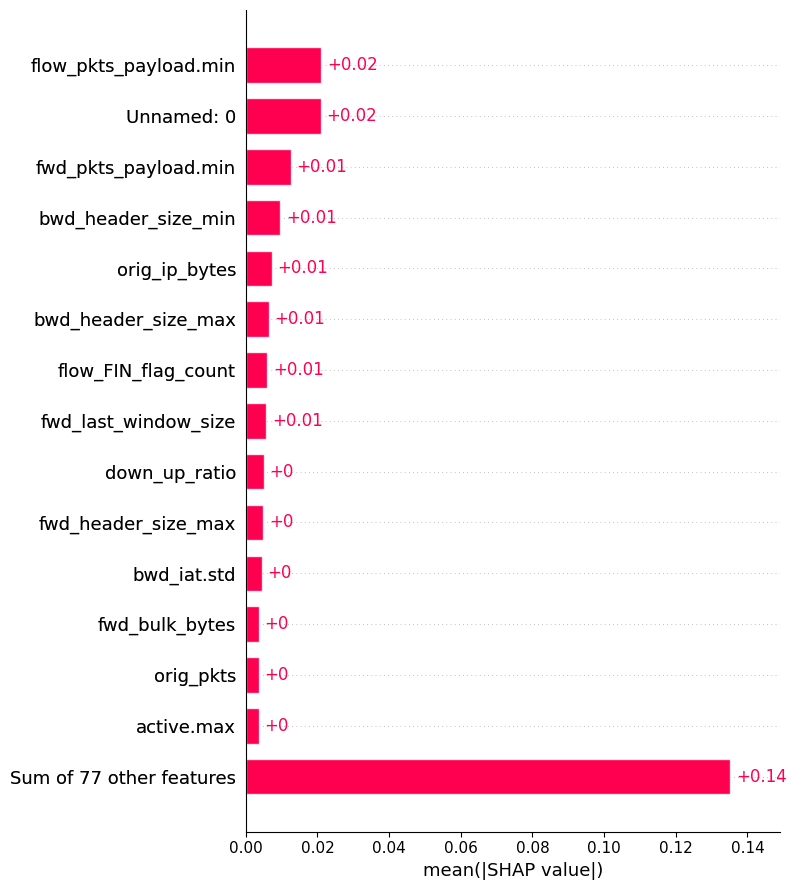

✅ Feature importance bar chart saved to shap_plots/global_bar_importance.png


In [229]:
# --- Top Features Bar Plot ---
plt.figure(figsize=(8, 6))
shap.plots.bar(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_bar_importance.png", dpi=150)
plt.show()
plt.close()
print("✅ Feature importance bar chart saved to shap_plots/global_bar_importance.png")


In [227]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: overall importance
shap.plots.bar(expl, max_display=15, show=False)
axes[0].set_title("Top Features (mean |SHAP|)")

# Right: per-sample distribution
shap.plots.beeswarm(expl, max_display=15, show=False)
axes[1].set_title("Feature Impact Distribution")

plt.tight_layout()
plt.savefig("shap_plots/global_combined_shap.png", dpi=150)
plt.close()


In [231]:
plt.figure(figsize=(8, 6))
shap.plots.bar(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_beeswarm_barstyle.png", dpi=150)
plt.close()
print("✅ Bar-style beeswarm (ranked SHAP importance) saved.")

✅ Bar-style beeswarm (ranked SHAP importance) saved.


In [ ]:
X

,Unnamed: 0,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size
0,84579,56248,5353,0.0,0.0,0.0,0,1,78,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,84580,50214,5353,0.0,0.0,0.0,0,1,74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,84581,58369,5353,0.0,0.0,0.0,0,1,73,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,84582,57377,5353,0.0,0.0,0.0,0,1,74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,84583,12345,5353,0.0,0.0,0.0,0,1,74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3212450,37674,80,0.0,0.0,0.0,0,1,80,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,508,502,508
179996,3231811,60718,80,0.0,0.0,0.0,0,1,93,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,508,502,508
179997,3172471,42636,80,0.0,0.0,0.0,0,1,110,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,508,502,508
179998,3200140,53658,80,0.0,0.0,0.0,0,1,75,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,507,502,507


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

SEED = 42
NUM_FOLDS = 5

# =========================
# Define base models
# =========================
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

xgbm = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=SEED,
    n_jobs=-1,
    use_label_encoder=False
)

catb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=SEED
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=SEED,
    n_jobs=-1
)

base_models = {
    "LightGBM": lgbm,
    "XGBoost": xgbm,
    "CatBoost": catb,
    "RandomForest": rf
}

# =========================
# Stacking setup
# =========================
X_stack = X_train.copy()
y_stack = y_train.copy()
X_test_ = X_test.copy()
y_test_ = y_test.copy()

oof_preds = np.zeros((X_stack.shape[0], len(base_models)))
test_preds = np.zeros((X_test_.shape[0], len(base_models)))

skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)

# =========================
# Cross-validation training
# =========================
for fold, (train_idx, val_idx) in enumerate(skf.split(X_stack, y_stack)):
    print(f"\n🌀 Fold {fold+1}/{NUM_FOLDS}")
    X_tr, X_val = X_stack[train_idx], X_stack[val_idx]
    y_tr, y_val = y_stack[train_idx], y_stack[val_idx]

    for i, (name, model) in enumerate(base_models.items()):
        print(f"  ▶ Training {name}...")
        model.fit(X_tr, y_tr)
        val_pred = model.predict(X_val)
        test_pred = model.predict(X_test_)

        # 🔧 Ensure 1D shape
        val_pred = np.ravel(val_pred)
        test_pred = np.ravel(test_pred)

        oof_preds[val_idx, i] = val_pred
        test_preds[:, i] += test_pred / NUM_FOLDS


# =========================
# Meta-learner
# =========================
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
meta_learner.fit(oof_preds, y_stack)
final_preds = meta_learner.predict(test_preds)

# =========================
# Evaluation
# =========================
print("\n===============================")
print("📊 Classification Reports")
print("===============================")

for name, model in base_models.items():
    preds = model.predict(X_test_)
    print(f"\n{name}:\n", classification_report(y_test_, preds, digits=4))

print("\n🧩 Stacked Ensemble (Meta-Learner):\n", classification_report(y_test_, final_preds, digits=4))





🌀 Fold 1/5
  ▶ Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13129
[LightGBM] [Info] Number of data points in the train set: 100800, number of used features: 80
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

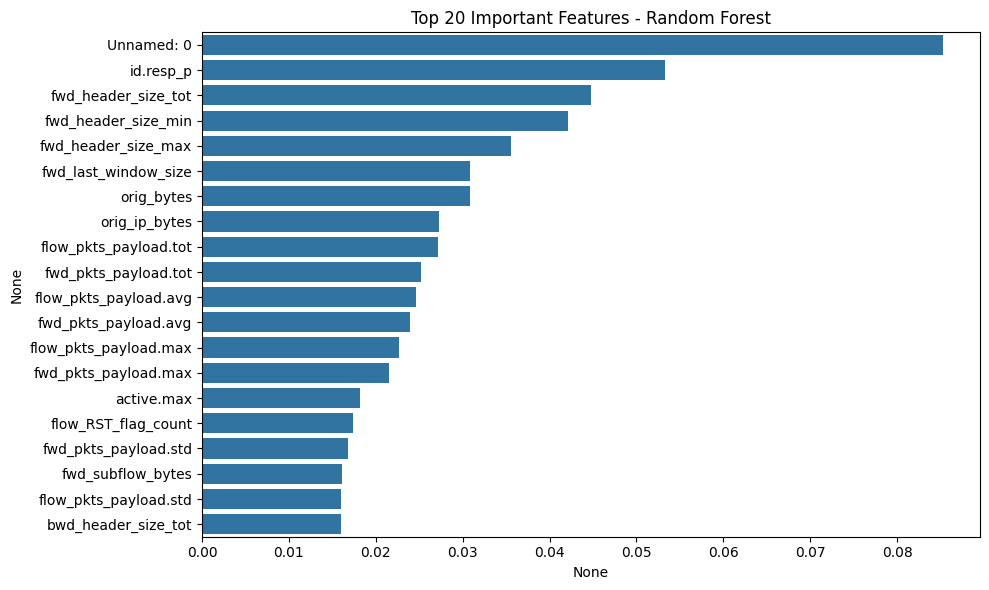

In [234]:
# =========================
# Feature Importance (Random Forest)
# =========================
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Important Features - Random Forest")
plt.tight_layout()
plt.show()

In [204]:
class OneDCNN(nn.Module):
    def __init__(self, input_len, num_classes):
        super(OneDCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
        self.global_pool = nn.AdaptiveMaxPool1d(1)   # replaces GlobalMaxPooling1D
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x shape: (batch, seq_len, channels) → need to permute for Conv1d
        x = x.permute(0, 2, 1)
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x 

In [205]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_len, num_classes):
        super(CNN_LSTM, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
    
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, batch_first=True)
        
        self.fc1 = nn.Linear(64, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input x: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                   # → (batch, 1, seq_len)
        x = torch.relu(self.bn1(self.conv1(x)))  # (batch, 64, L-2)
        x = torch.relu(self.conv2(x))            # (batch, 128, L-4)
        x = self.pool(x)                         # (batch, 128, (L-4)//2)
        
        # LSTM expects (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]                              # take last hidden state (batch, 64)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x 

In [206]:
class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64, num_heads=4):
        super(CNN_BiLSTM_Attention, self).__init__()
        
        # CNN feature extractor
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)
        
        # BiLSTM block
        self.bilstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        # Multi-Head Self-Attention
        self.attention = nn.MultiheadAttention(embed_dim=2*lstm_hidden, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(2*lstm_hidden)

        # Dense layers
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                 # (batch, 1, seq_len)
        x = torch.relu(self.conv1(x))          # (batch, 64, seq_len)
        x = torch.relu(self.conv2(x))          # (batch, 128, seq_len)
        x = self.pool(x)                       # (batch, 128, seq_len//2)
        
        # Prepare for LSTM: (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        x, _ = self.bilstm(x)                  # (batch, seq_len//2, 2*lstm_hidden)
        
        # Multihead Self-Attention with residual connection
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)

        # Global average pooling over the sequence dimension
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)    # (batch, 2*lstm_hidden)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)                        # logits
        return x


In [207]:
class OneDCNN(nn.Module):
    def __init__(self, input_len, num_classes):
        super(OneDCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
        self.global_pool = nn.AdaptiveMaxPool1d(1)   # replaces GlobalMaxPooling1D
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x shape: (batch, seq_len, channels) → need to permute for Conv1d
        x = x.permute(0, 2, 1)
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x 